# Importing all the libraries that we will need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bananaboi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Getting the data ready

In [2]:
meta_data = pd.read_csv("root2ai - Data.csv")
meta_data

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain
...,...,...
22699,fourth study discusses blockchain technology e...,Reg Tech
22700,book finishes stating biggest issue emerging F...,Reg Tech
22701,people culture cess,Reg Tech
22702,author challenges execu tive lead change stop ...,Reg Tech


In [3]:
meta_data.columns

Index(['Text', 'Target'], dtype='object')

In [4]:
meta_data.shape

(22704, 2)

In [5]:
meta_data.head(10)

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain
5,agarwal head bank,Blockchain
6,several data security regulatory oversight wou...,Blockchain
7,relevance transaction register available publi...,Blockchain
8,technology need transaction intermediary clear...,Blockchain
9,seven bank morgan chase already support certai...,Blockchain


In [6]:
meta_data.isna().any()

Text       True
Target    False
dtype: bool

In [7]:
meta_data.dropna(inplace=True)
meta_data.reset_index(drop=True, inplace=True)
meta_data

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain
...,...,...
22696,fourth study discusses blockchain technology e...,Reg Tech
22697,book finishes stating biggest issue emerging F...,Reg Tech
22698,people culture cess,Reg Tech
22699,author challenges execu tive lead change stop ...,Reg Tech


# Visualizing the count of categories of 'Target' from the dataset

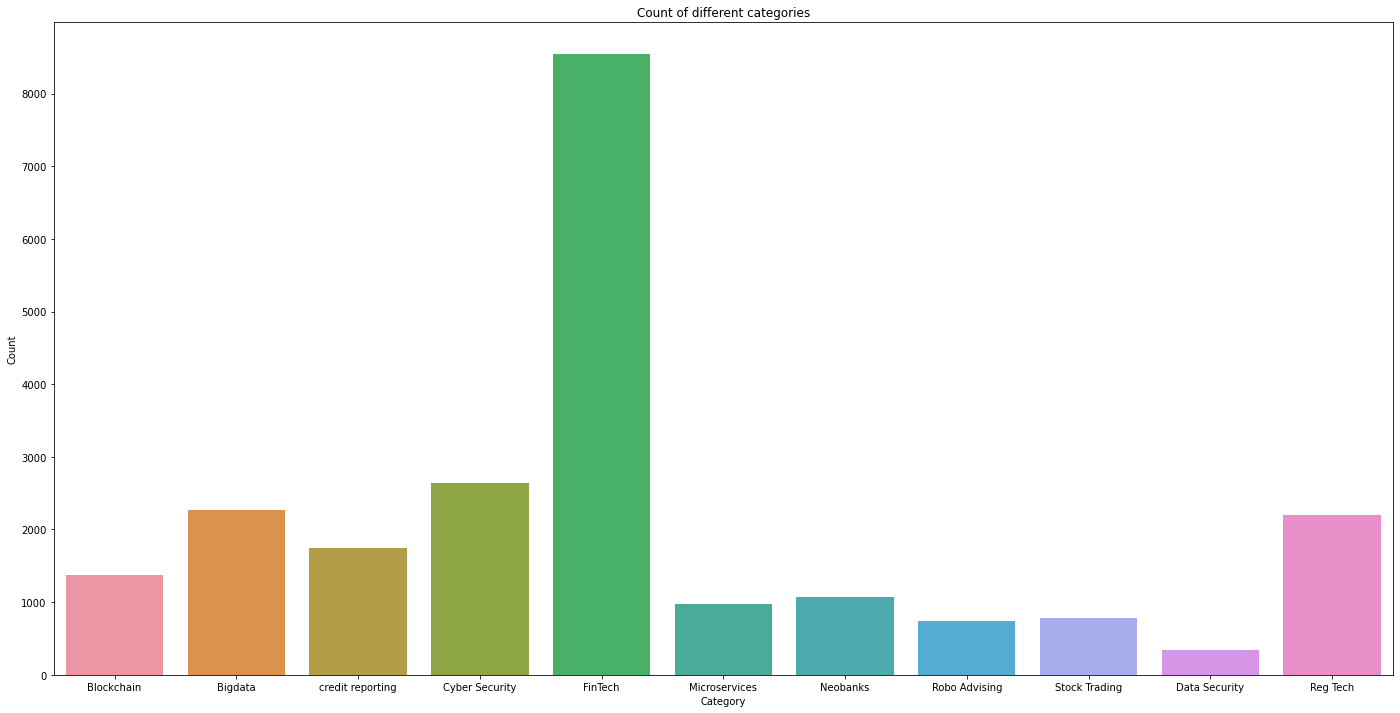

In [8]:
plt.figure(figsize=(24,12))
sns.countplot(x='Target', data=meta_data)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of different categories')
plt.show()

# Data cleaning and preprocessing

In [9]:
category = list(meta_data['Target'].unique())
category.sort()
category

['Bigdata',
 'Blockchain',
 'Cyber Security',
 'Data Security',
 'FinTech',
 'Microservices',
 'Neobanks',
 'Reg Tech',
 'Robo Advising',
 'Stock Trading',
 'credit reporting']

In [10]:
meta_data

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain
...,...,...
22696,fourth study discusses blockchain technology e...,Reg Tech
22697,book finishes stating biggest issue emerging F...,Reg Tech
22698,people culture cess,Reg Tech
22699,author challenges execu tive lead change stop ...,Reg Tech


# Mapping the categories to values

In [11]:
category_mapper = {'Bigdata': 0, 'Blockchain': 1, 'Cyber Security': 2, 'Data Security': 3,'FinTech': 4, 'Microservices': 5,
                   'Neobanks': 6, 'Reg Tech': 7, 'Robo Advising': 8, 'Stock Trading': 9, 'credit reporting': 10 }
meta_data['Target'] = meta_data['Target'].map(category_mapper)
meta_data.head(10)

,Text,Target
0,reserve bank forming expert committee based in...,1
1,director could play role financial system,1
2,preliminary discuss secure transaction study r...,1
3,security indeed prove essential transforming f...,1
4,bank settlement normally take three days based...,1
5,agarwal head bank,1
6,several data security regulatory oversight wou...,1
7,relevance transaction register available publi...,1
8,technology need transaction intermediary clear...,1
9,seven bank morgan chase already support certai...,1


# Cleaning the Text

In [12]:
corpus = []
ps = PorterStemmer()

for i in range(0, meta_data.shape[0]):
    description = re.sub(pattern='[^a-zA-Z]', repl=' ', string=meta_data['Text'][i]) # Cleaning special character from the description
    description = description.lower() # Converting the entire description into lower case
    words = description.split() # Tokenizing the description by words
    description_words = [word for word in words if word not in set(stopwords.words('english'))] # Removing the stop words
    words = [ps.stem(word) for word in description_words] # Stemming the words
    description = ' '.join(words) # Joining the stemmed words
    corpus.append(description) # Creating a corpus

In [13]:
corpus[0:2]

['reserv bank form expert committe base institut develop research bank technolog studi approach distribut ledger technolog help support shift',
 'director could play role financi system']

In [14]:
len(corpus)

22701

In [15]:
Bigdata_words = []
for i in list(meta_data[meta_data['Target']==0].index):
    Bigdata_words.append(corpus[i])

Blockchain_words = []
for i in list(meta_data[meta_data['Target']==1].index):
    Blockchain_words.append(corpus[i])

Cybersec_words = []
for i in list(meta_data[meta_data['Target']==2].index):
    Cybersec_words.append(corpus[i])

Datasec_words = []
for i in list(meta_data[meta_data['Target']==3].index):
    Datasec_words.append(corpus[i])
    
Fintech_words = []
for i in list(meta_data[meta_data['Target']==4].index):
    Fintech_words.append(corpus[i])
    
Microservices_words = []
for i in list(meta_data[meta_data['Target']==5].index):
    Microservices_words.append(corpus[i])
    
Neobanks_words = []
for i in list(meta_data[meta_data['Target']==6].index):
    Neobanks_words.append(corpus[i])
    
RegTech_words = []
for i in list(meta_data[meta_data['Target']==7].index):
    RegTech_words.append(corpus[i])
    
RoboAdvising_words = []
for i in list(meta_data[meta_data['Target']==8].index):
    RoboAdvising_words.append(corpus[i])
    
Stocktrading_words = []
for i in list(meta_data[meta_data['Target']==9].index):
    Stocktrading_words.append(corpus[i])

Creditrep_words = []
for i in list(meta_data[meta_data['Target']==10].index):
    Creditrep_words.append(corpus[i])
    
    
bigdata = ''
blockchain = ''
cybersec = ''
datasec = ''
fintech = ''
microservices = ''
neobanks = ''
regtech = ''
roboadvising = ''
stocktrading = ''
creditrep = ''

for i in range(0, 10):
    bigdata += Bigdata_words[i]
    blockchain += Blockchain_words[i]
    cybersec += Cybersec_words[i]
    datasec += Datasec_words[i]
    fintech += Fintech_words[i]
    microservices += Microservices_words[i]
    neobanks += Neobanks_words[i]
    regtech += RegTech_words[i]
    roboadvising += RoboAdvising_words[i]
    stocktrading += Stocktrading_words[i]
    creditrep += Creditrep_words[i]
    

# Creating wordcloud for Big Data category

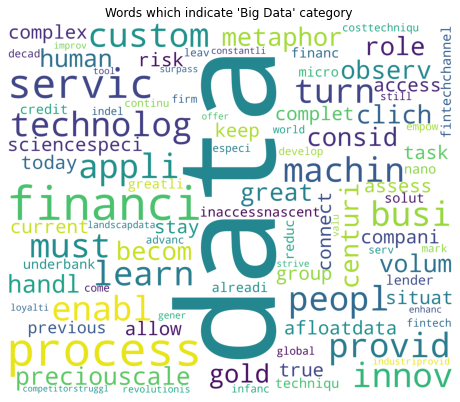

In [16]:
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(bigdata)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'Big Data' category ")
plt.show()

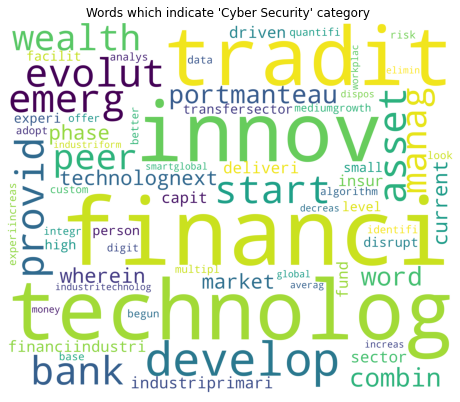

In [17]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(cybersec)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'Cyber Security' category ")
plt.show()

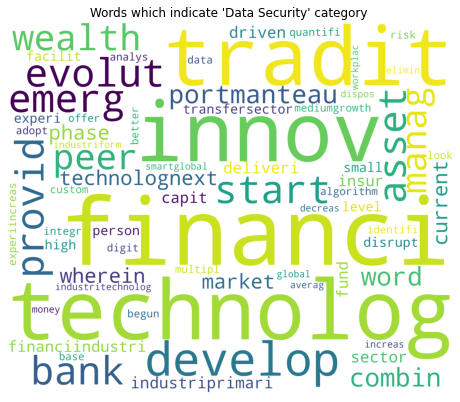

In [18]:
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(datasec)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'Data Security' category ")
plt.show()

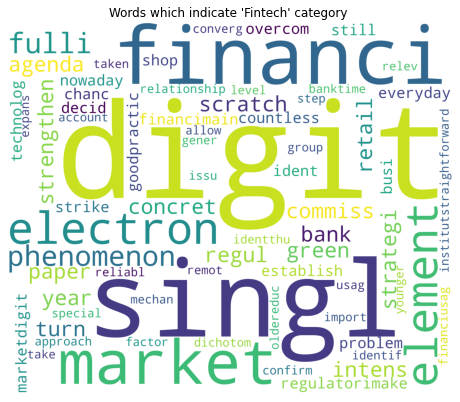

In [19]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(fintech)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'Fintech' category ")
plt.show()


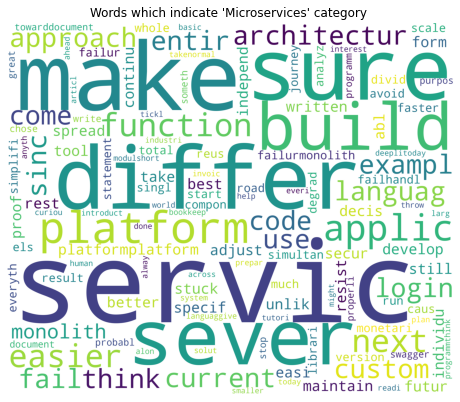

In [20]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(microservices)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'Microservices' category ")
plt.show()


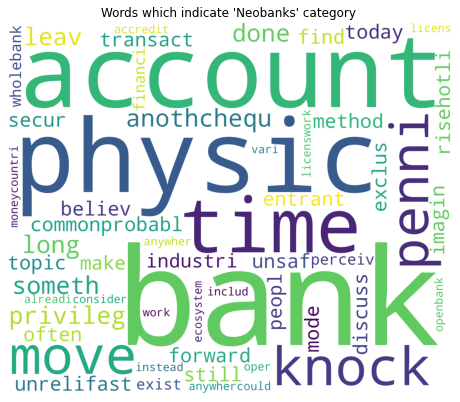

In [21]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(neobanks)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'Neobanks' category ")
plt.show()


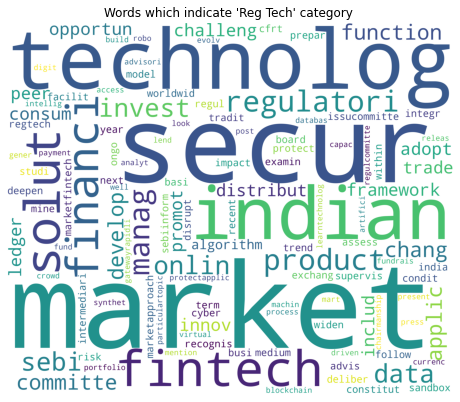

In [22]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(regtech)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'Reg Tech' category ")
plt.show()


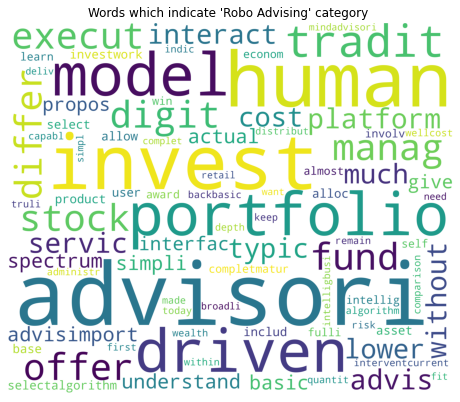

In [23]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(roboadvising)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'Robo Advising' category ")
plt.show()


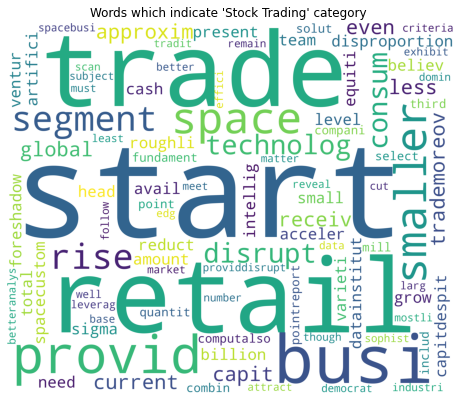

In [24]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(stocktrading)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'Stock Trading' category ")
plt.show()

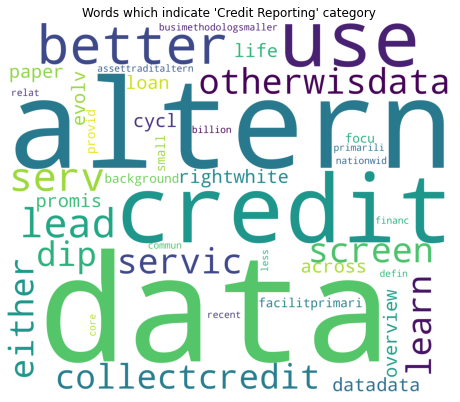

In [25]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(creditrep)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'Credit Reporting' category ")
plt.show()


# Creating Bag of Words Model

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

cv = CountVectorizer(max_features=10000, min_df=3, max_df=0.7, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [27]:
y = meta_data['Target'].values

# Implementing TF-IDF

In [28]:
#commented out the code as TF-IDF is lowering accuracy
"""" 
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray() 
"""

'" \nfrom sklearn.feature_extraction.text import TfidfTransformer\ntfidfconverter = TfidfTransformer()\nX = tfidfconverter.fit_transform(X).toarray() \n'

# Model Building

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)
print('X_train size: {}, X_test_size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18160, 10000), X_test_size: (4541, 10000)


# Fitting Naive Bayes to the Training Set

In [30]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

# Prediciting the test set results

In [31]:
nb_y_pred = nb_classifier.predict(X_test)

## Accuracy Naive Bayes

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,nb_y_pred))
print(classification_report(y_test,nb_y_pred))
print(accuracy_score(y_test, nb_y_pred))

[[ 271    6   10    0  134    3    0   18    0    3    6]
 [   8  136   11    0  119    4    0    2    0    1    5]
 [  11   14  290    2  179    5    0   21    1    3   14]
 [   7    1   33    6   25    1    0    2    0    0    3]
 [  33   37   59    1 1474   13    8   30   10   10   37]
 [   4    4   10    0   76   89    1    1    0    0    1]
 [   3    2    3    0  147    1   42    2    0    0    2]
 [  24    3    9    0   78    0    1  316    0    4    7]
 [   3    0    4    0   79    0    3    3   42    1    2]
 [   6    0    6    0   69    1    1    3    0   89    0]
 [  14    4   12    0   87    1    0    7    0    3  204]]
              precision    recall  f1-score   support

           0       0.71      0.60      0.65       451
           1       0.66      0.48      0.55       286
           2       0.65      0.54      0.59       540
           3       0.67      0.08      0.14        78
           4       0.60      0.86      0.71      1712
           5       0.75      0.48   

# Fitting the Data using RandomForrestClassifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(random_state=0)

# Prediciting the test set results

In [34]:
rf_y_pred = classifier.predict(X_test)

## Accuracy RandomForrest

In [35]:
print(confusion_matrix(y_test,rf_y_pred))
print(classification_report(y_test,rf_y_pred))
print(accuracy_score(y_test, rf_y_pred))

[[ 328    4    8    0   75    4    2   12    2    1   15]
 [  19   84   25    0  131    7    7    3    2    3    5]
 [  21    9  253    4  200    6    2   18    4    3   20]
 [   8    1   28    2   26    1    2    0    1    0    9]
 [  92   26   65    1 1384   22   25   29   13   11   44]
 [   9    5   19    0   71   72    3    0    1    3    3]
 [   9    0    3    0  113    4   59    7    1    1    5]
 [  48    3   13    0   58    1    3  313    0    1    2]
 [   6    0    5    0   70    2    2    0   48    3    1]
 [  10    2    8    0   67    1    1    4    0   79    3]
 [  17    4   13    0   99    2    5    1    1    1  189]]
              precision    recall  f1-score   support

           0       0.58      0.73      0.64       451
           1       0.61      0.29      0.40       286
           2       0.57      0.47      0.52       540
           3       0.29      0.03      0.05        78
           4       0.60      0.81      0.69      1712
           5       0.59      0.39   

# Linear SVC

In [36]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)
SVC_y_pred = model.predict(X_test)

# Evaluation

print(confusion_matrix(y_test,SVC_y_pred))
print(classification_report(y_test,SVC_y_pred))
print(accuracy_score(y_test, SVC_y_pred))

[[ 289    9   17    2  106    6    2   10    4    1    5]
 [   9  144   18    1   85    4    7    3    6    1    8]
 [  22   21  288   18  140    5    6   11    7    5   17]
 [   8    2   25   11   22    0    2    4    0    0    4]
 [  54   51  115   13 1237   39   62   28   37   22   54]
 [   5    7   11    1   45  105    5    0    3    1    3]
 [   3    6   10    2   90    5   76    2    2    4    2]
 [  32    0   16    0   71    2    4  307    3    3    4]
 [   4    1    9    0   43    4    6    1   64    4    1]
 [  10    2    7    1   50    0    3    0    3   96    3]
 [  12    6   16    3   84    1    1    4    1    3  201]]
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       451
           1       0.58      0.50      0.54       286
           2       0.54      0.53      0.54       540
           3       0.21      0.14      0.17        78
           4       0.63      0.72      0.67      1712
           5       0.61      0.56   